IF USING PYTHON 3, DO NOT USE QUOTES.
What is the filename of the data to be analyzed?: 0119_final_promoter_p1_YPD_8h.xlsx

How would you like the data to be analyzed?
"1" Parse data automatically using only the Full Name and Values.
"2" Parse data manually by specifying columns.
Your answer: 2
We found the following columns:
['Well' 'Promoter' 'Count' 'Volume (µL)' 'Events / µL' '% of This Plot'
 '% of All' 'GFP' 'CV FL1-A']

Which column would you like to occupy the x-axis?: Promoter
Which column would you like to occupy the y-axis?: GFP
Promoter      ACT1     ADH1     ADH2      ASC1      CCW12       CIT1  \
0         36663.04      NaN      NaN       NaN        NaN        NaN   
1              NaN  3719.78      NaN       NaN        NaN        NaN   
2              NaN      NaN  6552.77       NaN        NaN        NaN   
3              NaN      NaN      NaN  17173.35        NaN        NaN   
4              NaN      NaN      NaN       NaN  393481.33        NaN   
5              NaN    

/Users/leodespaux/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


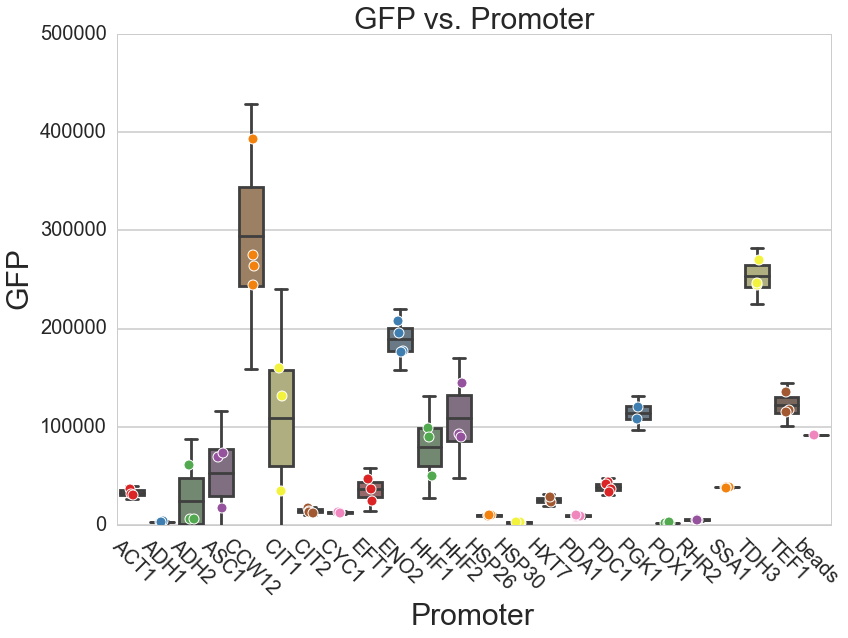

In [ ]:
##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline  

# Parses the excel file manually 
def parseExcelManual(filename):
    df = pd.read_excel(filename)
    print("We found the following columns:")
    print(df.columns.values)
    print("")
    xcol = input("Which column would you like to occupy the x-axis?: ")
    
    while xcol not in df.columns.values:
        print("Invalid column name")
        xcol = input("Please enter a valid column name: ")

    ycol = input("Which column would you like to occupy the y-axis?: ")
    while ycol not in df.columns.values:
        print("Invalid column name")
        ycol = input("Please enter a valid column name: ")

    title = ycol + " vs. " + xcol
    
    # making a new series, where xcol is the label, and then makes correspondence
    # between the label and the value
    DataOrg = pd.DataFrame(data={xcol: df[xcol], ycol: df[ycol]})
    
    # dropna removes anything thats without a value (NaN)
    DataOrg = DataOrg.dropna(axis = 0)
    
    # flips/trasnposes to make it easier to work with 
    DataOrg = DataOrg.pivot_table(ycol, xcol, DataOrg.index)
    DataOrg = DataOrg.T
    print(DataOrg)

    box = "y" #input("Do you want a boxplot? (y/n): ")
    normalize = "n" #input("Do you want to normalize the y-axis? (y/n): ")
    if normalize == 'y':
        # amax is the max value of the values, fills NaN with zeroes
    DataOrg = DataOrg / np.amax(reorg.fillna(0).values)
    title = title + " Normalized"
        
    if box == "y":
        makeBoxplot(DataOrg)
    sns.stripplot(data=DataOrg, size = 10, jitter = True, palette = sns.color_palette("Set1", n_colors=8, desat=.9))
    
    #here make styles
    sns.set_context("poster")
    sns.set_style("whitegrid")
    plt.ylabel(ycol, fontsize=30)
    plt.xlabel(xcol, fontsize=30)
    plt.title(title, fontsize=30)
    plt.gca().set_ylim(bottom = 0)
    #plt.gca().set_ylim(top = 400000)
    plt.xticks(size=20, rotation=315) 
    plt.yticks(size=20) 

    plt.show()
    
    #make statistical file
    exportExcel(DataOrg);


# Parses the excel condition data file and organizes it into a dataframe.
def parseExcelCondition(filename):
    df = pd.read_excel(filename, index = False)
    # Placeholder columns
    df['Date'] = ""
    df['Gene'] = "a"
    df['Sample'] = "b"
    df['Condition'] = "c"
    df2 = pd.DataFrame()

    # Iterates through, extracting data from the full name. 
    for i in df.iterrows():
        _, series = i;

        fullName = series[0]
        splitName = fullName.split("_")
        date = splitName[0]
        gene = splitName[1]
        sample = splitName[2]
        condition = splitName[3]

        series.replace(series.get('Date'), date, inplace = True)
        series.replace(series.get('Gene'), gene, inplace = True)
        series.replace(series.get('Sample'), sample, inplace = True)
        series.replace(series.get('Condition'), condition, inplace = True)
        df2 = df2.append(series)

    # Reorganizes the data into something more readable, without the full name.
    df2 = df2[['Gene', 'Date', 'Sample', 'Condition', 'Values']]

    return df2

def conditionPlot(data):

    data = data.pivot_table('Values', ['Sample'], ['Gene', 'Condition'])
    answer = input("Do you want a boxplot to go with your data? (y/n): ")
    normalize = input("Would you like to normalize the y-axis? (y/n): ")
    if normalize == 'y':
        data = data / np.amax(data.fillna(0).values)
        
    if answer == "y":
        makeBoxplot(data)
        # Iterate through the columns, generating data to form the boxplot.

    #INSERT HERE
    #sns.stripplot(data=data, size = 7, jitter = True, palette = sns.color_palette("Set1", n_colors=8, desat=.9))
    #ylabel = input("What should the y-axis label be?: ")
    #set_context("talk", font_scale=5)
    #plt.ylabel(ylabel, fontsize=30)
    #plt.xlabel('Gene/Condition', rotation=270, fontsize=30)
    #plt.show()




def makeBoxplot(tempTable):
    # making separate data frame with mean, std, etc, over std(0), which is
    # the category name
    stdevSeries = tempTable.std(0)
    meanSeries = tempTable.mean(0)
    boxTable = tempTable.copy(deep=True)
    boxTable = boxTable.T.drop(boxTable.T, axis = 1)
    boxTable = boxTable.T

    # Iterate through the rows to find the psuedo data for boxplot.
    for index, value in stdevSeries.iteritems():
        mean = meanSeries[index]
        stdev = stdevSeries[index]
        # make a separate data frame containing mean, std dev etc
        tempSer = pd.Series(data=[mean-2*stdev,mean-stdev,mean-stdev/2,mean,mean+stdev/2,mean+stdev,mean+2*stdev],
                            index = [1, 2, 3, 4, 5, 6, 7])
        boxTable[index] = tempSer
    
    #set style
    sns.set_context("poster")
    sns.set_style("whitegrid")
    sns.boxplot(data=boxTable, palette = sns.color_palette("Set1", n_colors=8, desat=.3))

def exportExcel(tempTable):

    toExport = input("Do you want to export statistical data to an excel file? (y/n): ")    
    
    if toExport == 'y':
        filename = input("What should the filename be? (Do not include extension): ")

        if ".xls" not in filename:
            filename = filename + ".xls"

        stdevSeries = tempTable.std(0)
        meanSeries = tempTable.mean(0)
        boxTable = tempTable.copy(deep=True)
        boxTable = boxTable.T.drop(boxTable.T, axis = 1)
        boxTable = boxTable.T

        outTable = tempTable.copy(deep=True)
        finalSeries = pd.DataFrame()

        for index, value in stdevSeries.iteritems():
            mean = meanSeries[index]
            stdev = stdevSeries[index]
            # make a separate data frame containing mean, std dev etc
            tempSer = pd.Series(data=[stdev, mean],
                                index = ["Standard Deviation", "Mean"])
            boxTable[index] = tempSer

        for index, value in tempTable.iteritems():
            outTable[index].dropna(inplace=True)
            tempSeries = outTable[index].reset_index(drop=True)
            finalSeries[index] = tempSeries

        finalSeries = finalSeries.append(boxTable)
        writer = ExcelWriter(filename)

        finalSeries.to_excel(writer,'Sheet1')
    
        writer.save()

    
    
# Initial user interface.
def askUser():
    print("IF USING PYTHON 3, DO NOT USE QUOTES.")
    filename = input("What is the filename of the data to be analyzed?: ")
    print("")
    print("How would you like the data to be analyzed?")
    print("\"1\" Parse data automatically using only the Full Name and Values.")
    print("\"2\" Parse data manually by specifying columns.")
    parser = input("Your answer: ")

    if parser == "1":
        if isTime(filename):
            data = parseExcelTime(filename)
            answer = input("Do you want a linear regression for your data? (y/n): ")
            if answer == "n":
                timePlotScatter(data)
            else:
                timePlotLine(data)
        else:
            data = parseExcelCondition(filename)
            conditionPlot(data)
    else:
        parseExcelManual(filename)

askUser()

# Testing Files:
# conditionData.xlsx
# timeData.xlsx
# leodata2.xlsx